# Get started with physt

This tutorial describes some basic features of physt.

In [1]:
# Necessary import evil
from physt import binnings, h1, h2, h3
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)     # Have always the same data

## Getting physt (to run)

I believe you can skip this section but anyway, for the sake of completeness, the default way of installing a relatively stable version of physt is via pip:

`pip install physt`

Alternatively, you can download the source code from github (https://github.com/janpipek/physt).

You will need **numpy** to use physt (required), but there are other packages (optional) that are very useful if you want to use physt at its best: **matplotlib** for plotting (or **bokeh** as a not-so-well supported alternative).

## Your first histogram

If you need to create a histogram, call the `histogram` (or `h1`) function with your data (like heights of people) as the first argument. The default gives a reasonable result...

In [2]:
# Basic dataset
heights = [160, 155, 156, 198, 177, 168, 191, 183, 184, 179, 178, 172, 173, 175,
           172, 177, 176, 175, 174, 173, 174, 175, 177, 169, 168, 164, 175, 188,
           178, 174, 173, 181, 185, 166, 162, 163, 171, 165, 180, 189, 166, 163,
           172, 173, 174, 183, 184, 161, 162, 168, 169, 174, 176, 170, 169, 165]

hist = h1(heights)     # Automatically select all settings
hist

Histogram1D(bins=(10,), total=56, dtype=int32)

...which is an object of the Histogram1D type that holds all the bin information...

In [3]:
hist.bins          # All the bins

array([[155. , 159.3],
       [159.3, 163.6],
       [163.6, 167.9],
       [167.9, 172.2],
       [172.2, 176.5],
       [176.5, 180.8],
       [180.8, 185.1],
       [185.1, 189.4],
       [189.4, 193.7],
       [193.7, 198. ]])

In [4]:
hist.frequencies   # All the frequencies

array([ 2,  6,  5, 11, 15,  7,  6,  2,  1,  1])

...and provides further features and methods, like plotting for example...

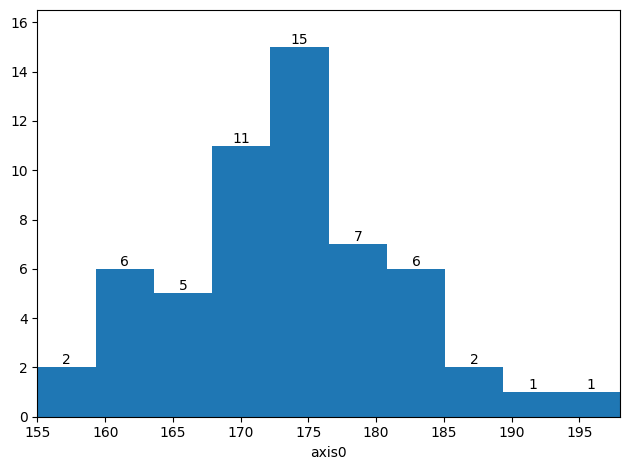

In [5]:
hist.plot(show_values=True);

...or adding new values (note that this is something numpy.histogram won't do for you)...

Histogram1D(bins=(10,), total=64, dtype=int32)

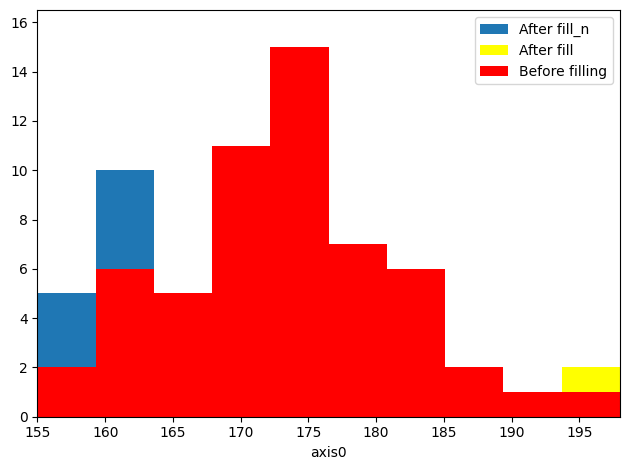

In [6]:
original = hist.copy()             # Store the original data to see changes

# ******* Here comes a lonely giant
hist.fill(197)                     

step1 = hist.copy()                # Store the intermediate value

# ******* And a bunch of relatively short people
hist.fill_n([160, 160, 161, 157, 156, 159, 162])

# See how the plot changes (you can safely ignore the following 4 lines)
ax = hist.plot(label="After fill_n")
step1.plot(color="yellow", ax=ax, label="After fill")
original.plot(color="red", ax=ax, label="Before filling")
ax.legend(loc=1)

# See the number of entries 
hist

## Data representation

The primary goal of physt library is to represent histograms as data objects with a set methods for easy manipulation and analysis (including mathematical operations, adaptivity, summary statistics. ...). The histogram classes used in [ROOT](https://root.cern.ch/) framework served as inspiration but not as a model to copy (though relevant methods often have same names).

Based on its dimensionality, a histogram is an instance of one of the following classes (all inheriting from **HistogramBase**):

* **Histogram1D** for univariate data
* **Histogram2D** for bivariate data
* **HistogramND** for data with higher dimensionality
* ...or some special dedicated class (user-provided). Currently, there is a **PolarHistogram** as an example (considered to be experimental, not API-stable).

However, these objects are \__init\__ialized with already calculated data and therefore, you typically don't construct the yourselves but call one of the facade functions:

* **histogram** or **h1**
* **histogram2d** or **h2**
* **histogramdd** (or **h3** for 3D case)

These functions try to find the best binning schema, calculate bin contents and set other properties for the histograms. In principle (if not, submit a bug report), if you call a function with arguments understood by eponymous numpy functions ([histogram](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram.html), [histogram2d](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogram2d.html) and [histogramdd](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.histogramdd.html)), you should receive histogram with exactly the same bin edges and bin contents. However, there are many more arguments available!

In [7]:
# Back to people's parameters...
heights = np.random.normal(172, 10, 100)
weights = np.random.normal(70, 15, 100)
iqs = np.random.normal(100, 15, 100)

In [8]:
# 1D histogram
h1(heights)

Histogram1D(bins=(10,), total=100, dtype=int32)

In [9]:
# 2D histogram
h2(heights, weights, [5, 7])

Histogram2D(bins=(5, 7), total=100, dtype=int64)

In [10]:
# 3D histogram
h3([heights, weights, iqs])      # Simplification with respect to numpy.histogramdd

HistogramND(bins=(10, 10, 10), total=100, dtype=int64)

So, what do these objects contain? In principle:

- binning schema (`_binning` or `_binnings`)
- bin contents (`frequencies`) together with errors (`errors`)
- some statistics about the data (`mean`, `variance`, `std`)
- metadata (like `name` and `axis_name` or `axis_names`)
- ...

In the following, properties of `Histogram1D` will be described. Analogous methods and data fields do exist also for `Histogram2D` and `HistogramND`, perhaps with the name in plural.

### Binning schema

The structure of bins is stored in the histogram object as a hidden attribute `_binning`. This value is an instance of one of the binning classes that are all descendants of `physt.binnings.BinningBase`. You are not supposed to directly access this value because manipulating it without at the same time updating the bin contents is dangerous.

A dedicated notebook deals with the binning specifics, here we sum at least the most important features.

`Histogram1D` offers the following attributes to access (read-only or read-only-intended) the binning information (explicitly or implicitly stored in `_binning`):

In [11]:
# Create a histogram with "reasonable" bins
data = np.random.normal(0, 7, 10000)
hist = h1(data, "pretty", bin_count=4)
hist

Histogram1D(bins=(6,), total=10000, dtype=int32)

In [12]:
hist._binning         # Just to show, don't use it

FixedWidthBinning(bin_width=10.0, bin_count=6, min=-30.0)

In [13]:
hist.bin_count        # The total number of bins

6

In [14]:
hist.bins             # Bins as array of both edges

array([[-30., -20.],
       [-20., -10.],
       [-10.,   0.],
       [  0.,  10.],
       [ 10.,  20.],
       [ 20.,  30.]])

In [15]:
hist.edges       # Bin edges with the same semantics as the numpy.histogram

array([-30., -20., -10.,   0.,  10.,  20.,  30.])

In [16]:
hist.bin_left_edges

array([-30., -20., -10.,   0.,  10.,  20.])

In [17]:
hist.bin_right_edges

array([-20., -10.,   0.,  10.,  20.,  30.])

In [18]:
hist.bin_centers      # Centers of the bins - useful for interpretation of histograms as scatter data

array([-25., -15.,  -5.,   5.,  15.,  25.])

In [19]:
hist.bin_widths       # Widths of the bins - useful for calculating densities and also for bar plots

array([10., 10., 10., 10., 10., 10.])

Just as a simple overview of binning schemas, that are provided by physt, we show the bins as produced by different schemas:

In [20]:
list(binnings.binning_methods.keys())        # Show them all

['numpy',
 'pretty',
 'human',
 'quantile',
 'static',
 'integer',
 'fixed_width',
 'exponential',
 'blocks',
 'knuth',
 'scott',
 'freedman']

These names can be used as the second parameter of the `h1` function:

In [21]:
# Fixed-width
h1(data, "fixed_width", bin_width=6).numpy_bins  

array([-30., -24., -18., -12.,  -6.,   0.,   6.,  12.,  18.,  24.,  30.])

In [22]:
# Numpy-like
print("Expected:", np.histogram(data, 5)[1])

print("We got:", h1(data, "numpy", bin_count=5).numpy_bins)

Expected: [-26.89092563 -16.07128189  -5.25163815   5.56800559  16.38764933
  27.20729307]
We got: [-26.89092563 -16.07128189  -5.25163815   5.56800559  16.38764933
  27.20729307]


In [23]:
# Integer - centered around integers; useful for integer data
h1(data, "integer").numpy_bins     

array([-27.5, -26.5, -25.5, -24.5, -23.5, -22.5, -21.5, -20.5, -19.5,
       -18.5, -17.5, -16.5, -15.5, -14.5, -13.5, -12.5, -11.5, -10.5,
        -9.5,  -8.5,  -7.5,  -6.5,  -5.5,  -4.5,  -3.5,  -2.5,  -1.5,
        -0.5,   0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,
         8.5,   9.5,  10.5,  11.5,  12.5,  13.5,  14.5,  15.5,  16.5,
        17.5,  18.5,  19.5,  20.5,  21.5,  22.5,  23.5,  24.5,  25.5,
        26.5,  27.5])

In [24]:
# Exponential - positive numbers required
h1(np.abs(data), "exponential").numpy_bins      # We 'abs' the values

array([1.03182494e-03, 2.03397046e-03, 4.00943579e-03, 7.90354415e-03,
       1.55797507e-02, 3.07113654e-02, 6.05393490e-02, 1.19337344e-01,
       2.35242068e-01, 4.63717632e-01, 9.14096888e-01, 1.80190069e+00,
       3.55197150e+00, 7.00177407e+00, 1.38021491e+01, 2.72072931e+01])

In [25]:
# Quantile - each bin should have a similar statistical importance
h1(data, "quantile", bin_count=5).numpy_bins


array([-26.89092563,  -5.87687499,  -1.69550961,   1.81670859,
         5.79232538,  27.20729307])

In [26]:
# Pretty - as friendly to your plots as possible, you may set an approximate number of bins
h1(data, "pretty").numpy_bins             

array([-30., -25., -20., -15., -10.,  -5.,   0.,   5.,  10.,  15.,  20.,
        25.,  30.])

### Bin contents

The bin contents (`frequencies`) and associated errors (`errors`) are stored as numpy arrays with a shape corresponding to number of bins (in all dimensions). Again, you cannot manipulate these properties diractly (unless you break the dont-touch-the-underscore convention).

In [27]:
hist = h1(data, "pretty")

hist.frequencies

array([   2,   23,  140,  604, 1580, 2601, 2691, 1640,  573,  124,   17,
          5])

Errors are calculated as $\sqrt(N)$ which is the simplest expectation for independent values. If you don't accept this, you can set your errors through `_errors2` field which contains squared errors.

Note: Filling with weights, arithmetic operations and scaling preserve correct error values under similar conditions.

In [28]:
hist.errors

array([ 1.41421356,  4.79583152, 11.83215957, 24.57641145, 39.74921383,
       51.        , 51.8748494 , 40.49691346, 23.93741841, 11.13552873,
        4.12310563,  2.23606798])

In [29]:
# Doubling the histogram doubles the error
(hist * 2).errors

array([  2.82842712,   9.59166305,  23.66431913,  49.15282291,
        79.49842766, 102.        , 103.74969879,  80.99382693,
        47.87483681,  22.27105745,   8.24621125,   4.47213595])

### Data types

Internally, histogram bins can contain values in several types (`dtype` in numpy terminology). By default, this is either `np.int64` (for histograms without weights) or `np.float64` (for histograms with weight). Wherever possible, this distinction is preserved. If you try filling in with weights, if you multiply by a float constant, if you divide, ... - basically whenever this is reasonable - an integer histogram is automatically converted to a float one. 

In [30]:
hist = h1(data)
print("Default type:", hist.dtype)

hist = h1(data, weights=np.abs(data))    # Add some random weights
print("Default type with weights:", hist.dtype)

hist = h1(data)
hist.fill(1.0, weight=.44)
print("Default type after filling with weight:", hist.dtype)

hist = h1(data)
hist *= 2
print("Default type after multiplying by an int:", hist.dtype)

hist *= 5.6
print("Default type after multiplying by a float:", hist.dtype)

Default type: int32
Default type with weights: float64
Default type after filling with weight: float64
Default type after multiplying by an int: int32
Default type after multiplying by a float: float64


In [31]:
# You can specify the type in the method call
hist = h1(data, dtype="int32")
hist.dtype

dtype('int32')

In [32]:
# You can set the type of the histogram using the attribute
hist = h1(data)
hist.dtype = np.int32
hist.dtype

dtype('int32')

In [33]:
# Adding two histograms uses the broader range
hist1 = h1(data, dtype="int64")
hist2 = h1(data, dtype="float32")
(hist1 + hist2).dtype    # See the result!

dtype('float64')

### Manually create histogram instances

As mentioned, `h1` and `h2` are just facade functions. You can construct the objects directly using the constructors. The first argument accepts something that can be interpreted as binning or list of bins, second argument is an array of frequencies (numpy array or something convertible).

(Histogram1D(bins=(5,), total=15, dtype=int32),
 Histogram2D(bins=(2, 3), total=23.7, dtype=float64))

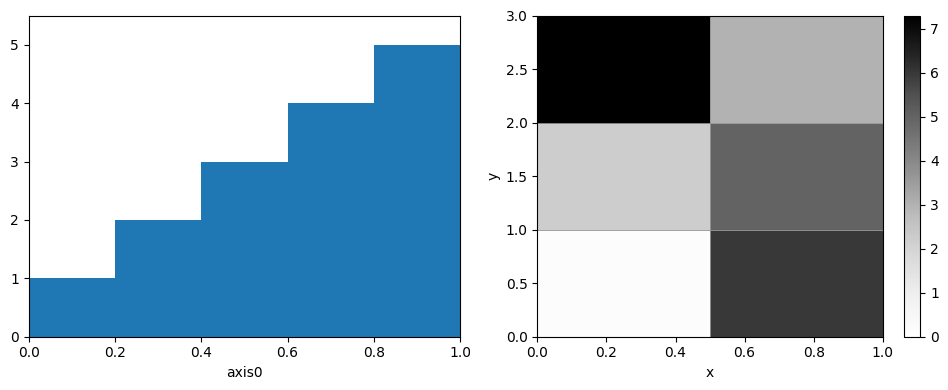

In [34]:
from physt.histogram1d import Histogram1D
from physt.histogram_nd import Histogram2D
hist1 = Histogram1D([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], [1, 2, 3, 4, 5])
hist2 = Histogram2D([[0, 0.5, 1], [0, 1, 2, 3]], [[0.2, 2.2, 7.3], [6, 5, 3]], axis_names=["x", "y"])

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
hist1.plot(ax = axes[0])
hist2.plot(ax = axes[1])
hist1, hist2

Histogram1D(bins=(9,), total=97.8, dtype=float64)

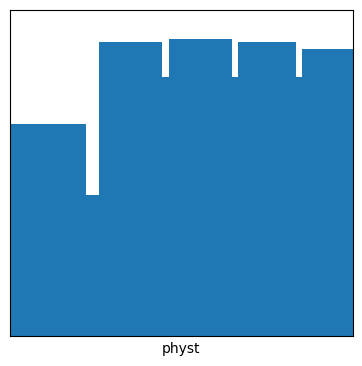

In [35]:
# Create a physt "logo", also available as physt.examples.fist
_, ax = plt.subplots(figsize=(4, 4))
widths = np.cumsum([0, 1.2, 0.2, 1, 0.1, 1, 0.1, 0.9, 0.1, 0.8])
fingers = np.asarray([4, 1, 7.5, 6, 7.6, 6, 7.5, 6, 7.2]) + 5
hist1 = Histogram1D(widths, fingers)
hist1.plot(lw=0, ax=ax)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel("physt")
hist1

## Indexing

Supported indexing is more or less compatible with numpy arrays.

In [36]:
hist.find_bin(3)             # Find a proper bin for some value (0 - based indices)

5

In [37]:
hist[3]                      # Return the bin (with frequency)

(array([-10.66146002,  -5.25163815]), 1600)

In [38]:
hist[-3:]                    # Sub-histogram (as slice)

Histogram1D(bins=(3,), total=559, dtype=int32)

In [39]:
hist[hist.frequencies > 5]   # Masked array (destroys underflow & overflow information)

Histogram1D(bins=(10,), total=10000, dtype=int32)

In [40]:
hist[[1, 3, 5]]              # Select some of the bins

Histogram1D(bins=(3,), total=4550, dtype=int32)

## Arithmetics

With histograms, you can do basic arithmetic operations, preserving bins and usually having intuitive meaning.

In [41]:
hist + hist

Histogram1D(bins=(10,), total=20000, dtype=int32)

In [42]:
hist - hist

C:\Users\janpi\Documents\code\physt\src\physt\histogram_base.py:933: UserWarning:

Subtracting histograms is considered to be a bad idea.



Histogram1D(bins=(10,), total=0, dtype=int32)

In [43]:
hist * 0.45

Histogram1D(bins=(10,), total=4500.000000000001, dtype=float64)

In [44]:
hist / 0.45

Histogram1D(bins=(10,), total=22222.222222222226, dtype=float64)

Some of the operations are prohibited:

In [45]:
try:
    hist * hist  # Does not make sense
except Exception as ex:
    print(repr(ex))

TypeError('Multiplication of two histograms is not supported.')


In [46]:
try:
    hist + 4  # Does not make sense
except Exception as ex:
    print(repr(ex))

TypeError("Only histograms can be added together. <class 'int'> found instead.")


In [47]:
try:
    (-0.2) * hist
except Exception as ex:
    print(repr(ex))

ValueError('Cannot have negative frequencies.')


Some of the above checks are dropped if you allow "free arithmetics". This you can do by:
1. Setting the `PHYST_FREE_ARITHMETICS` environment variable to 1 (note: not any other "truthy" value)
2. By setting `config.free_arithmetics` to True
3. By using the context manager `config.enable_free_arithmetics()`:

C:\Users\janpi\Documents\code\physt\src\physt\histogram_base.py:389: UserWarning:

Negative frequencies in the histogram.



Histogram1D(bins=(10,), total=-1999.9999999999998, dtype=float64)

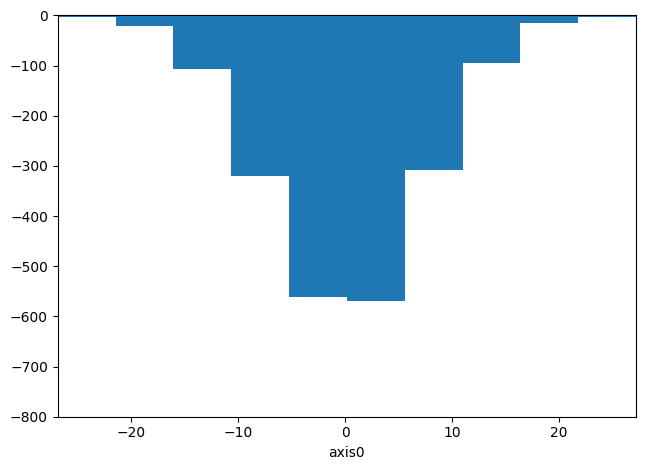

In [48]:
from physt.config import config
with config.enable_free_arithmetics():
    neg_hist = (-0.2) * hist
ax = neg_hist.plot()
ax.set_ylim((-800, 0))  # TODO: Rendering bug requires this
neg_hist

With this relaxation, you can also use any numpy array as (right) operand for any of the operations:

Histogram1D(bins=(10,), total=18628.188812174514, dtype=float64)

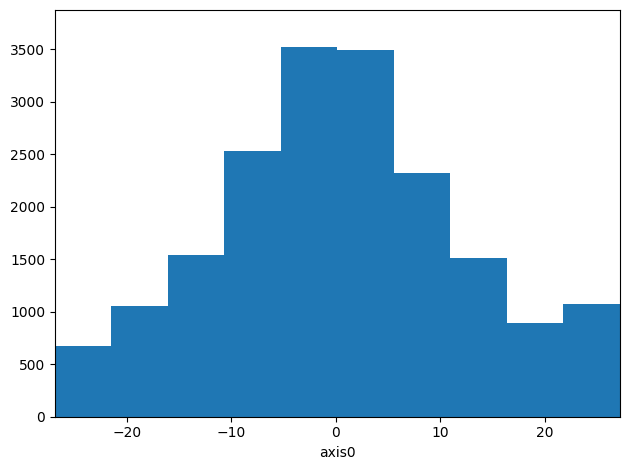

In [49]:
# Add some noise
with config.enable_free_arithmetics():
    hist_plus_array = hist + np.random.normal(800, 200, hist.shape)
hist_plus_array.plot()
hist_plus_array

If you need to side-step any rules completely, just use the histogram in a numpy array:

In [50]:
np.asarray(hist) * np.asarray(hist)
# Excercise: Reconstruct a histogram with original bins

array([    100,   10000,  285156, 2560000, 7856809, 8122500, 2383936,
        221841,    5625,     169])

## Statistics

When creating histograms, it is possible to keep simple statistics about the sampled distribution,
like mean() and std(). The behaviour was inspired by similar features in ROOT.

**To be yet refined.**

In [51]:
hist.statistics

Statistics(sum=71.86746661024517, sum2=484049.889433997, min=-26.890925629481504, max=27.207293074555718, weight=10000.0)

## Plotting

This is currently based on matplotlib, but other tools might come later (d3.js, bokeh?)

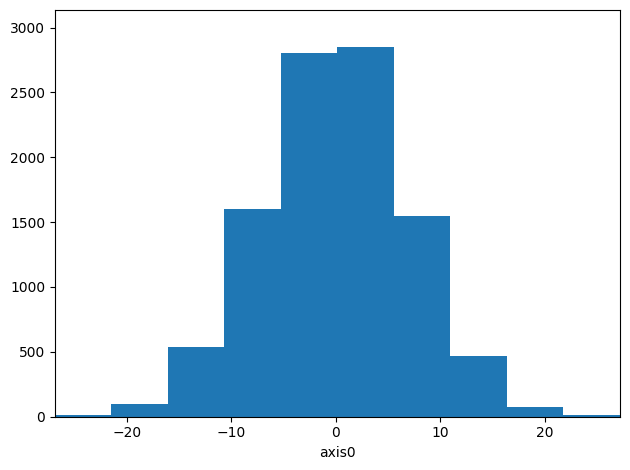

In [52]:
hist.plot();     # Basic plot

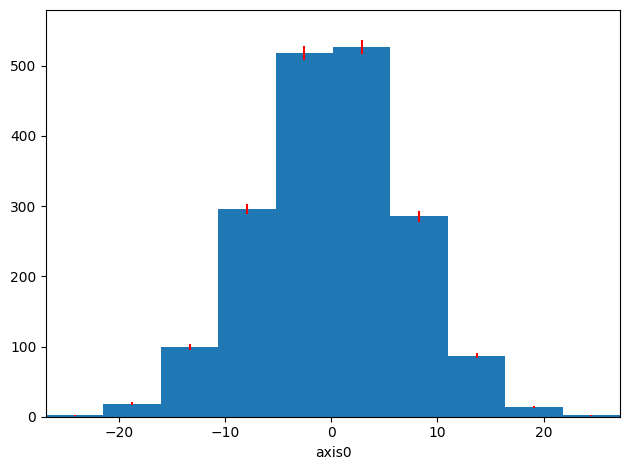

In [53]:
hist.plot(density=True, errors=True, ecolor="red");   # Include errors

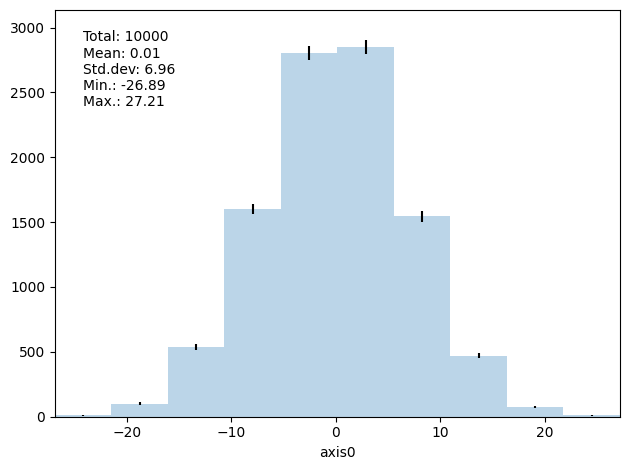

In [54]:
hist.plot(show_stats=True, errors=True, alpha=0.3);    # Show summary statistics (not fully supported yet)

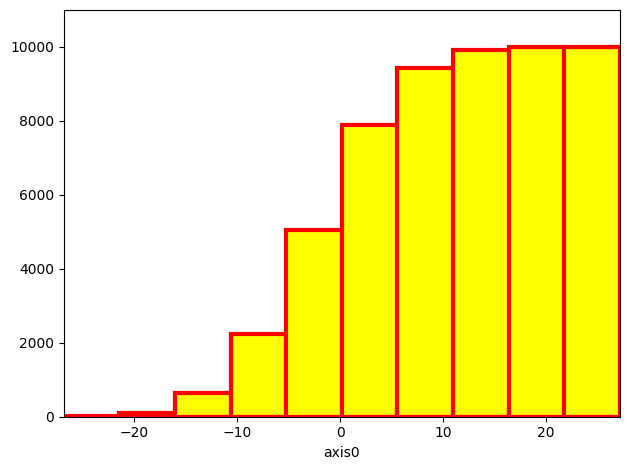

In [55]:
hist.plot(cumulative=True, color="yellow", lw=3, edgecolor="red");           # Use matplotlib parameters

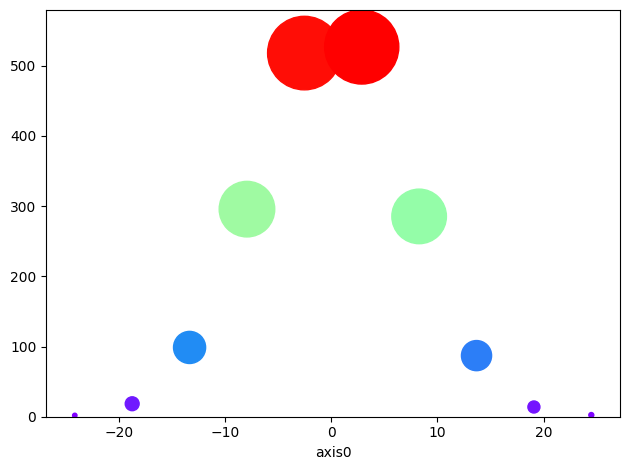

In [56]:
hist.plot(kind="scatter", s=hist.frequencies, cmap="rainbow", density=True);    # Another plot type

<Axes: xlabel='axis0'>

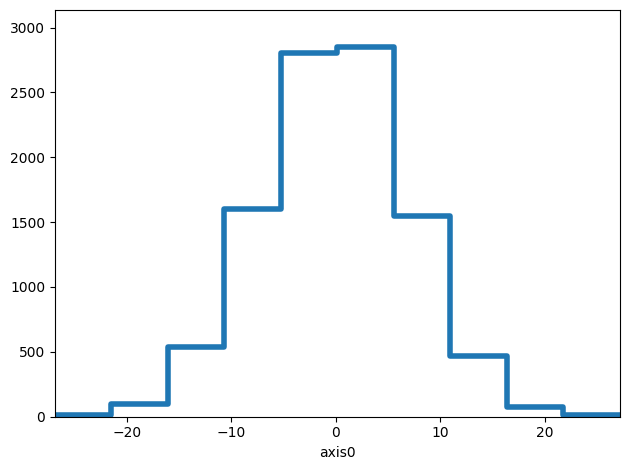

In [57]:
hist.plot(kind="step", lw=4)

<Axes: xlabel='axis0'>

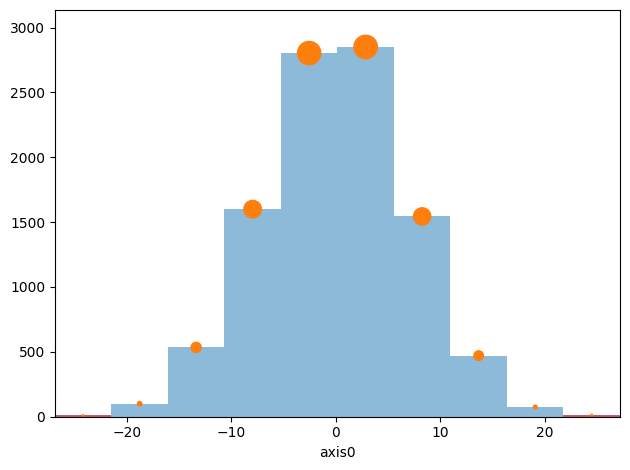

In [58]:
# Plot different bins using different styles
axis = hist[hist.frequencies > 5].plot(label="High", alpha=0.5)
hist[1:-1][hist[1:-1].frequencies <= 5].plot(ax=axis, color="green", label="Low", alpha=0.5)
hist[[0, -1]].plot(ax=axis, color="red", label="Edge cases", alpha=0.5)
hist.plot(kind="scatter", ax=axis, s=hist.frequencies / 10, label="Scatter")
# axis.legend();     # Does not work - why?

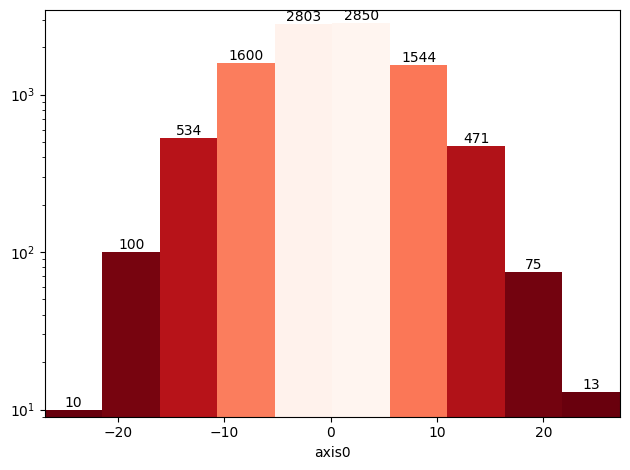

In [59]:
# Bar plot with colormap (with logarithmic scale)
ax = hist.plot(cmap="Reds_r", yscale="log", show_values=True);

## Irregular binning and densities

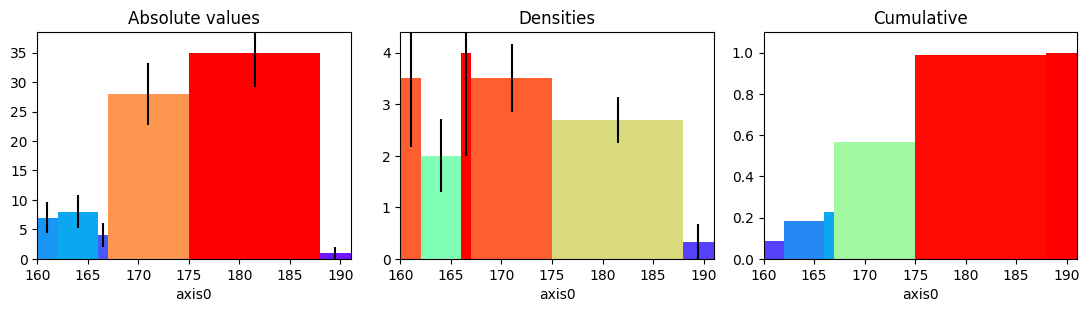

In [60]:
figure, axes = plt.subplots(1, 3, figsize=(11, 3))

hist_irregular = h1(heights, (160, 162, 166, 167, 175, 188, 191))
hist_irregular.plot(ax=axes[0], errors=True, cmap="rainbow")
hist_irregular.plot(ax=axes[1], density=True, errors=True, cmap="rainbow")
hist_irregular.plot(ax=axes[2], density=True, cumulative=True, cmap="rainbow")

axes[0].set_title("Absolute values")
axes[1].set_title("Densities")
axes[2].set_title("Cumulative");

## Adding new values

### Add (fill) single values

After 0 batches: Histogram1D(bins=(20,), total=9648, dtype=int32)
After 1 batches: Histogram1D(bins=(20,), total=19648, dtype=int32)
After 2 batches: Histogram1D(bins=(20,), total=29648, dtype=int32)
After 3 batches: Histogram1D(bins=(20,), total=39251, dtype=int32)


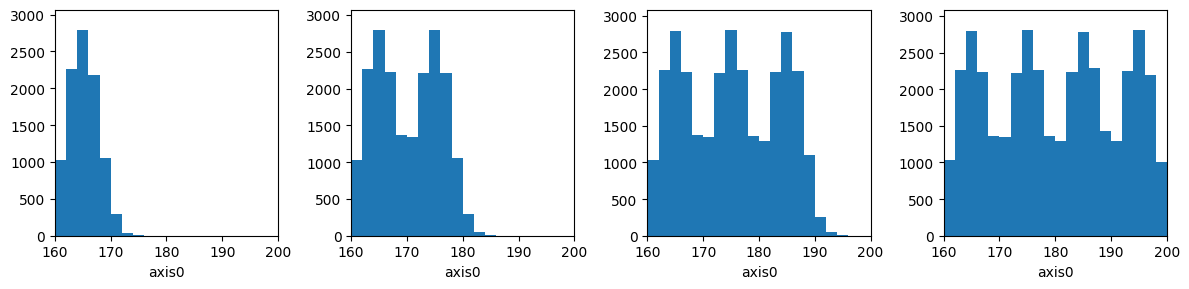

In [61]:
figure, axes = plt.subplots(1, 4, figsize=(12, 3))

hist3 = h1([], 20, range=(160, 200))

for i, ax in enumerate(axes):
    for height in np.random.normal(165 + 10 * i, 2.8, 10000):
        hist3.fill(height)
    hist3.plot(ax=ax);
    print("After {0} batches: {1}".format(i, hist3))
figure.tight_layout()

### Add histograms with the same binning

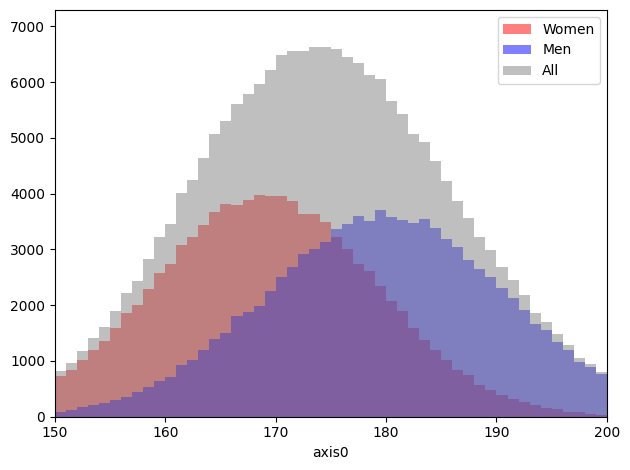

In [62]:
heights1 = h1(np.random.normal(169, 10, 100000), 50, range=(150, 200))
heights2 = h1(np.random.normal(180, 11, 100000), 50, range=(150, 200))


total = heights1 + heights2

axis = heights1.plot(label="Women", color="red", alpha=0.5)
heights2.plot(label="Men", color="blue", alpha=0.5, ax=axis)
total.plot(label="All", color="gray", alpha=0.5, ax=axis)
axis.legend();

## Compatibility

Note: Mostly, the compatibility is a trivial consequence of the object being convertible to numpy array

In [63]:
# Convert to pandas DataFrames
hist.to_dataframe()

,frequency,error
"[-26.890925629481504, -21.481103759077783)",10,3.162278
"[-21.481103759077783, -16.071281888674058)",100,10.000000
"[-16.071281888674058, -10.661460018270336)",534,23.108440
"[-10.661460018270336, -5.251638147866615)",1600,40.000000
"[-5.251638147866615, 0.15818372253710677)",2803,52.943366
"[0.15818372253710677, 5.568005592940832)",2850,53.385391
"[5.568005592940832, 10.97782746334455)",1544,39.293765
"[10.97782746334455, 16.387649333748275)",471,21.702534
"[16.387649333748275, 21.797471204152)",75,8.660254
"[21.797471204152, 27.207293074555718)",13,3.605551


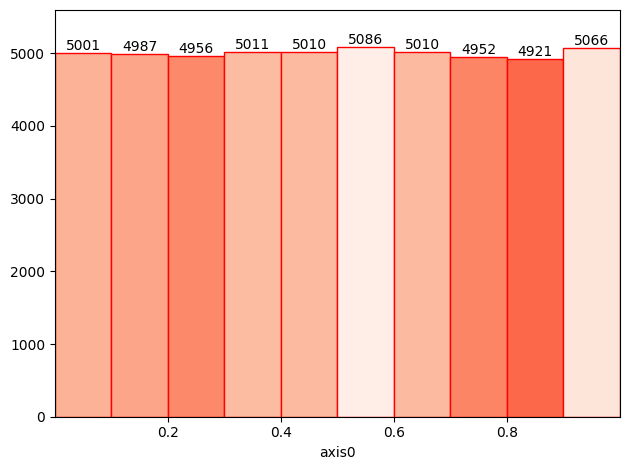

In [64]:
# Works on xarray
import xarray as xr
arr = xr.DataArray(np.random.rand(10, 50, 100))
h1(arr).plot(cmap="Reds_r", cmap_min=4744, cmap_max=5100, lw=1, edgecolor="red", show_values=True);

Histogram1D(bins=(10,), total=100, dtype=int32)

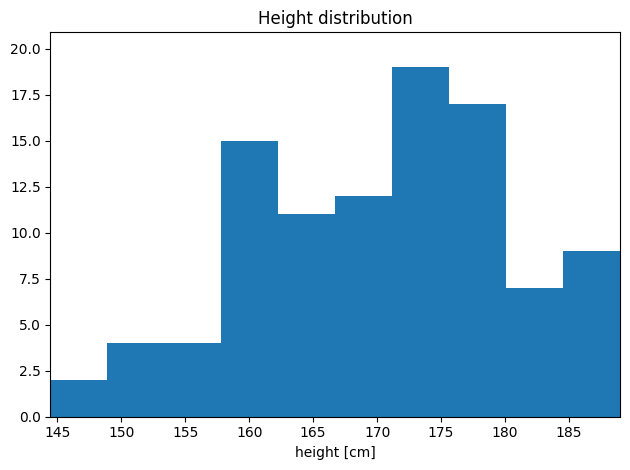

In [65]:
# Works on pandas Series
import pandas as pd
series = pd.Series(heights, name="height [cm]")
hist = h1(series, title="Height distribution")
hist.plot()
hist

Histogram1D(bins=(10,), total=100, dtype=int32)

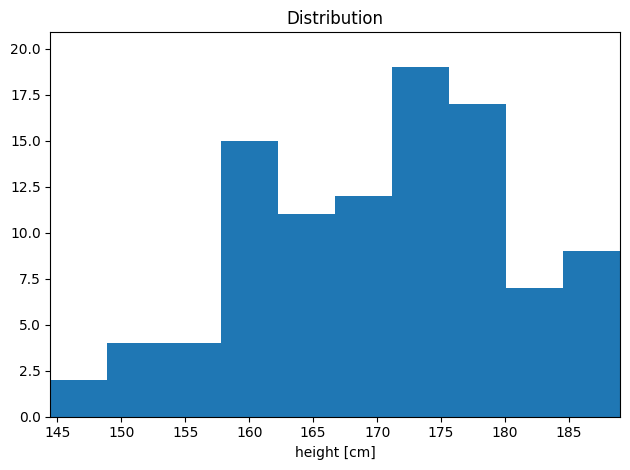

In [66]:
# Or
hist = series.physt.h1(title="Distribution")
hist.plot()
hist

## Export & import

In [67]:
json = hist.to_json()     # add path argument to write it to file
json

'{"histogram_type": "Histogram1D", "binnings": [{"adaptive": false, "binning_type": "NumpyBinning", "numpy_bins": [144.46274207992508, 148.91498677707023, 153.36723147421537, 157.81947617136055, 162.2717208685057, 166.72396556565084, 171.176210262796, 175.62845495994114, 180.0806996570863, 184.53294435423146, 188.9851890513766]}], "frequencies": [2, 4, 4, 15, 11, 12, 19, 17, 7, 9], "dtype": "int32", "errors2": [2, 4, 4, 15, 11, 12, 19, 17, 7, 9], "meta_data": {"name": null, "title": "Distribution", "axis_names": ["height [cm]"]}, "missed": [0, 0, 0], "missed_keep": true, "physt_version": "0.6.0a2", "physt_compatible": "0.3.20"}'

Histogram1D(bins=(10,), total=100, dtype=int32)

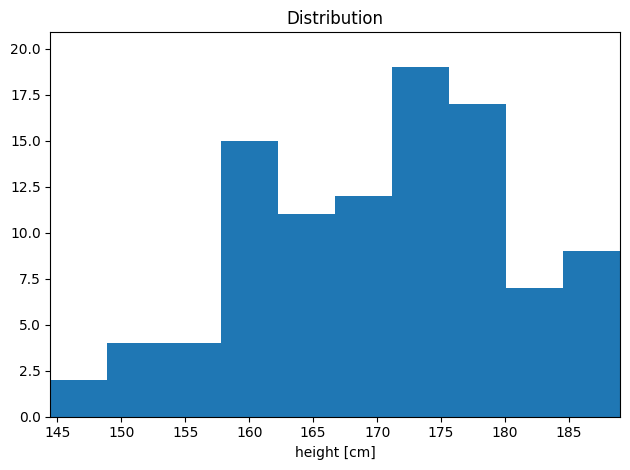

In [68]:
from physt.io import parse_json
hist = parse_json(json)
hist.plot()
hist